In [19]:
from sklearn import datasets
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

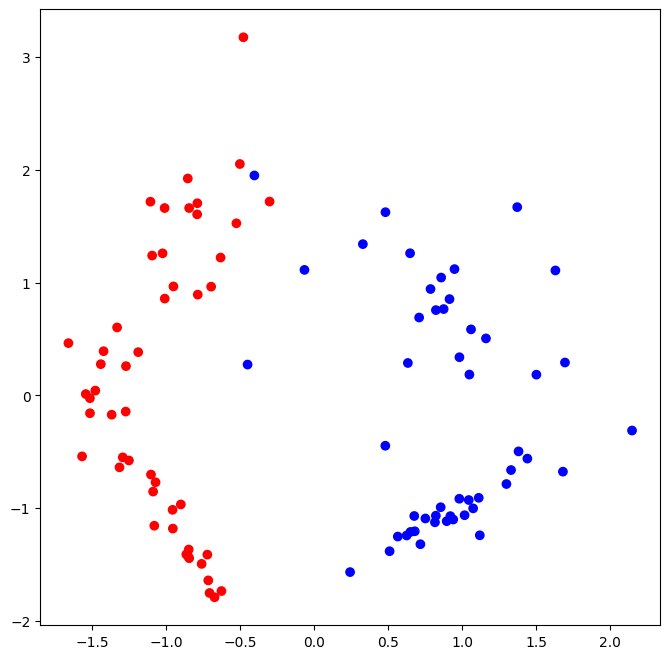

In [20]:
classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)

plt.show()

In [21]:
# перемешивание датасета
np.random.seed(12) # это число позволяет постоянно получать одну и ту же "случайность"
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# разбивка на обучающую и тестовую выборки
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (70, 2)
Размер массива признаков тестовой выборки (30, 2)
Размер массива ответов для обучающей выборки (70,)
Размер массива ответов для тестовой выборки (30,)


In [22]:
class LogisticRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    @staticmethod
    def log_loss(w, X, y):
        m = X.shape[1]
        z = np.dot(w.T, X)
        A = 1 / (1 + np.exp(-z))
        loss = (-1 / m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
        dw = (1 / m) * np.dot(X, (A - y).T)
        return loss, dw

    @staticmethod
    def optimize(w, X, y, n_iterations, eta):
        losses = []
        for i in range(n_iterations):
            loss, dw = LogisticRegression.log_loss(w, X, y)
            w = w - eta * dw
            losses.append(loss)
        return w, losses

    @staticmethod
    def predict(w, X, b=0.5):
        z = np.dot(w.T, X)
        A = 1 / (1 + np.exp(-z))
        y_predicted = np.zeros((1, X.shape[1]))
        for i in range(A.shape[1]):
            if A[0, i] >= b:
                y_predicted[0, i] = 1
            else:
                y_predicted[0, i] = 0
        return y_predicted

In [23]:
X_train_tr = X_train.T
y_train_tr = y_train.reshape(1, -1)
X_test_tr = X_test.T
y_test_tr = y_test.reshape(1, -1)

Итоговый вектор весов w: [[3.72659902]
 [0.22383415]]
Точность на обучающей выборке: 98.571
Точность на тестовой выборке: 96.667


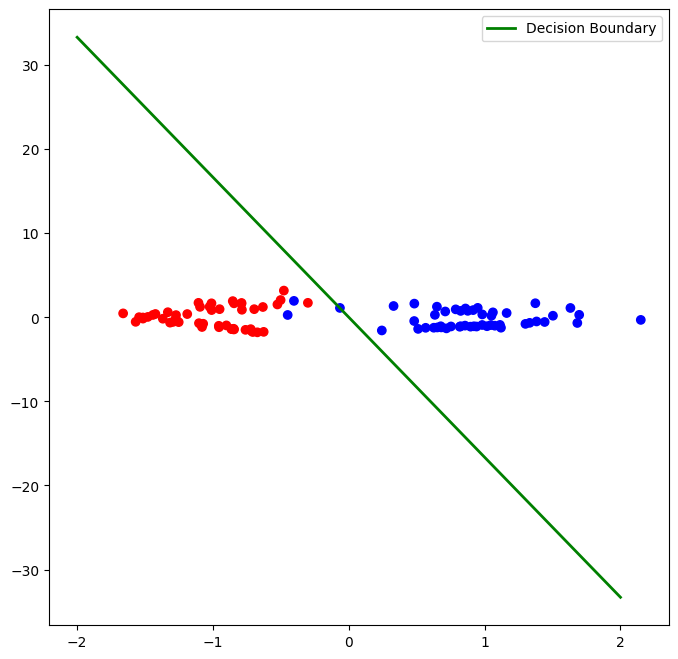

In [24]:
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 1000
eta = 0.05

w, losses = LogisticRegression.optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_test = LogisticRegression.predict(w, X_test_tr)
y_predicted_train = LogisticRegression.predict(w, X_train_tr)

train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)) * 100.0
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test - y_test_tr)) * 100.0

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

# Generate data for decision boundary plot
data = np.linspace(-2, 2, 100)
x1_boundary = - (w[0, 0] / w[1, 0]) * data if w[1, 0] != 0 else np.zeros_like(data)

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.plot(data, x1_boundary, 'g-', linewidth=2, label='Decision Boundary')
plt.legend()
plt.show()